# 1 - Adjusting Salaries to more Reasonable Amounts
While looking at 2018 data, I noticed that the maximum salary was about 2 million dollars.  As you will see in the following, when I break down salaries by currency, many of the maximum salaries are ~1 million.  Since salaries are inputted by hand, my guess is that some people added one too many zeros.  

### 1.1  Importing Libraries and Data
The data imported is from after I processed the [data](https://github.com/yscyang1/Predicting_Salaries_SO/blob/master/Pre-Processing%20Data.ipynb).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_2017 = pd.read_feather('tmp/df_2017_2keep')
df_2018 = pd.read_feather('tmp/df_2018_2keep')

In [3]:
df_2017 = df_2017[df_2017['Salary'] != 0]
df_2018 = df_2018[df_2018['Salary'] != 0]

In [4]:
df_2017 = df_2017.drop('index', axis = 1)
df_2018 = df_2018.drop('index', axis = 1)

In [5]:
df_2017 = df_2017.reset_index(drop = True)
df_2018 = df_2018.reset_index(drop = True)

# 2 - Adjusting by Currencies
I found that going through each currency as opposed to each country was more effective since 1) each country had multiple types of currencies that was difficult to generalize, and 2) there are ~20 currencies vs more than 100 countries.

For each currency, I compare distributions from the two years when possible to make sure I'm generally on the right track.

### 2.1 - Australian Dollars
There are about 50 people with salaries over 600k.  According to payscale.com, which I will be using for average software developer salaries in all countries, the average Australian annual salary for a software developer is 50k, which is pretty close to what we see in 2017.   

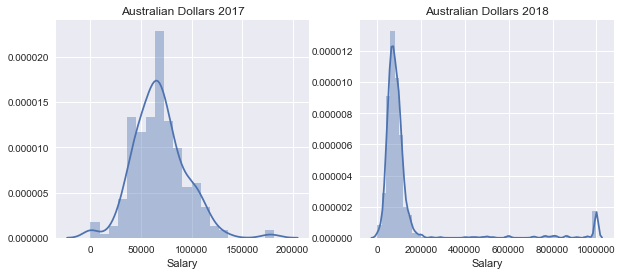

In [6]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Australian dollars (A$)']['Salary'], ax = axis1)
axis1.set_title('Australian Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Australian dollars (A$)']['Salary'], ax = axis2)
axis2.set_title('Australian Dollars 2018')


I've written a function that takes the dataframe, currency, and a threshold.  For the target currency, if the salary is over the threshold, the salary will be divided by 10.  In this case, I've set the threshold to 200,000.   

In [7]:
def divide_sal(df, currency, threshold):
    for idx, val in df[df['Currency']==currency]['Salary'].items():
        if val >= threshold:
            df['Salary'].iloc[idx] = val/10

In [8]:
divide_sal(df_2018, 'Australian dollars (A$)', 200000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


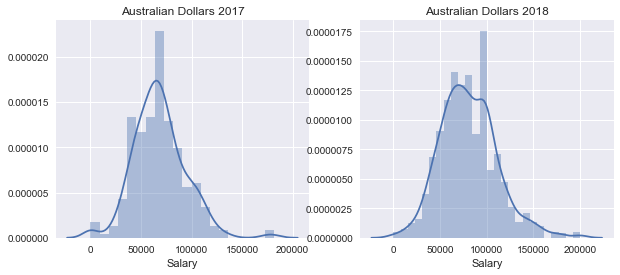

In [9]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Australian dollars (A$)']['Salary'], ax = axis1)
axis1.set_title('Australian Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Australian dollars (A$)']['Salary'], ax = axis2)
axis2.set_title('Australian Dollars 2018')

### 2.2 - Bitcoin
Now I have no idea who pays with bitcoin but whatever floats these people's boats.  Unfortunately, I don't know too much about bitcoin aside from prices had a crazy high in 2018 and then plummeted soon after.  However, after putting the adjusted salaries though a model or two, it was clear that there were 9 outliers (salaries above 400k), and all of them were from bitcoin.  Thus, I'm applying a threshold of 400k.  

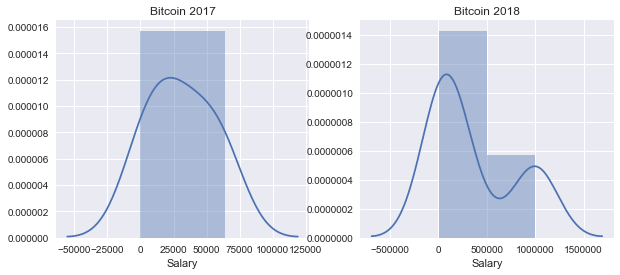

In [10]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Bitcoin (btc)']['Salary'], ax = axis1)
axis1.set_title('Bitcoin 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Bitcoin (btc)']['Salary'], ax = axis2)
axis2.set_title('Bitcoin 2018')


In [11]:
divide_sal(df_2018, 'Bitcoin (btc)', 400000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


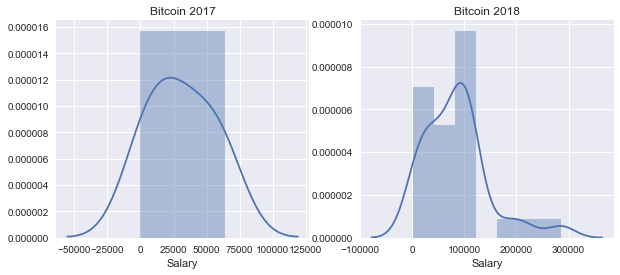

In [12]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Bitcoin (btc)']['Salary'], ax = axis1)
axis1.set_title('Bitcoin 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Bitcoin (btc)']['Salary'], ax = axis2)
axis2.set_title('Bitcoin 2018')


### 2.3 - Brazilian Reais
For Brazillian Reais, the average annual salary is ~16k, matching the 2017 data.  In 2018, again there are quite a bit of people reporting a salary of ~1 million.  I've set the threshold to 80k.  

In addition, there seems to be a higher than normal amount of people with low salaries in 2017.  Blogger Evelina Gabasova writes in her [blog](http://evelinag.com/blog/2017/06-20-stackoverflow-tabs-spaces-and-salary/index.html#.XFzBHlxKjIX) that in certain countries, especially those in central Europe, salaries are reported in terms of monthly salaries, not annual as those of us in the US are accustomed to.  As such, she suggests multiplying the lower salaries by 12.  I've written a function called multiply_sal() that is similar to divide_sal, in which it takes the data frame, currency, and a threshold.  Anything under the threshold is multiplied by 12.  

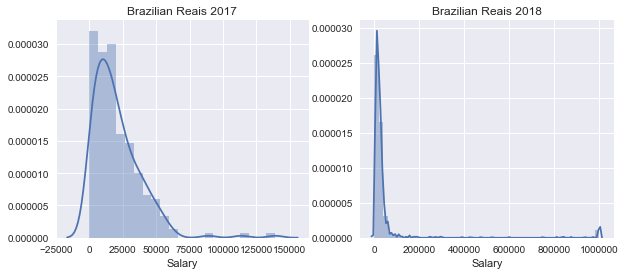

In [13]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Brazilian reais (R$)']['Salary'], ax = axis1)
axis1.set_title('Brazilian Reais 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Brazilian reais (R$)']['Salary'], ax = axis2)
axis2.set_title('Brazilian Reais 2018')


In [14]:
divide_sal(df_2018, 'Brazilian reais (R$)', 150000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Here, I show the distribution before applying multiply_sal().  The very first bin in 2017 looks abnormally high, especially compared to 2018.

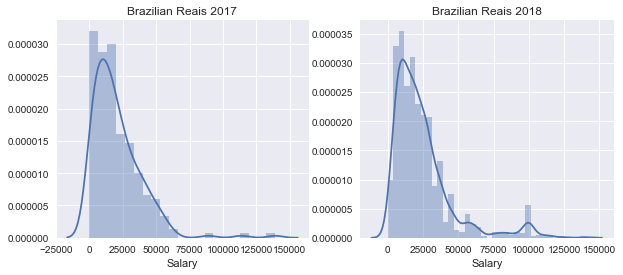

In [15]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Brazilian reais (R$)']['Salary'], ax = axis1)
axis1.set_title('Brazilian Reais 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Brazilian reais (R$)']['Salary'], ax = axis2)
axis2.set_title('Brazilian Reais 2018')

I've set the lower threshold to be 2500, and the resulting distribution looks more realistic.

In [16]:
def multiply_sal(df, currency, threshold):
    for idx, val in df[df['Currency']==currency]['Salary'].items():
        if val <= threshold:
            df['Salary'].iloc[idx] = val*12

In [17]:
multiply_sal(df_2017, 'Brazilian reais (R$)', 2500)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


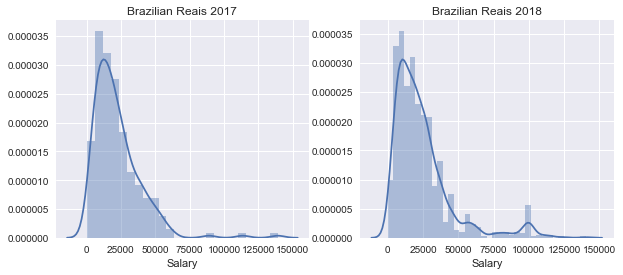

In [18]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Brazilian reais (R$)']['Salary'], ax = axis1)
axis1.set_title('Brazilian Reais 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Brazilian reais (R$)']['Salary'], ax = axis2)
axis2.set_title('Brazilian Reais 2018')

### 2.4 - British Pounds
The average annual salary for the British is ~40k.  I've set the threshold for 2018 to be 250k.  The peak salaries in 2018 seem to be a little higher than in 2017, but still at at an acceptable level.  

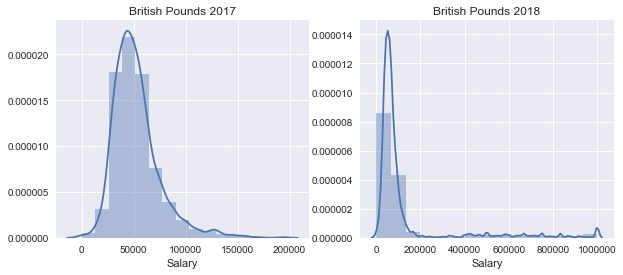

In [19]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'British pounds sterling (£)']['Salary'], bins = 15, ax = axis1)
axis1.set_title('British Pounds 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'British pounds sterling (£)']['Salary'], bins = 15, ax = axis2)
axis2.set_title('British Pounds 2018')

In [20]:
divide_sal(df_2018, 'British pounds sterling (£)', 250000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


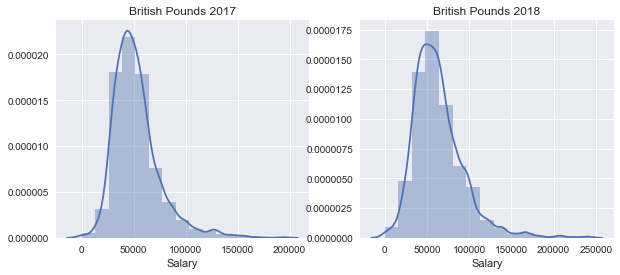

In [21]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'British pounds sterling (£)']['Salary'], bins = 15, ax = axis1)
axis1.set_title('British Pounds 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'British pounds sterling (£)']['Salary'], bins = 15, ax = axis2)
axis2.set_title('British Pounds 2018')


### 2.5 - Canadian Dollars
The average annual salary for Canadian software developers is ~50k.  After setting the 2018 threshold to 175k, we can see that in both 2017 and 2018, the peak salaries are a little higher than 50k but again, not unacceptably high.

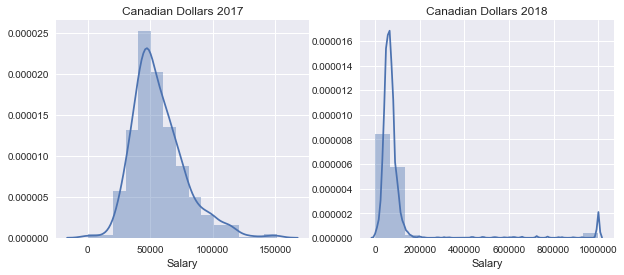

In [22]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Canadian dollars (C$)']['Salary'], bins = 15, ax = axis1)
axis1.set_title('Canadian Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Canadian dollars (C$)']['Salary'], bins = 15, ax = axis2)
axis2.set_title('Canadian Dollars 2018')

In [23]:
divide_sal(df_2018, 'Canadian dollars (C$)', 175000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


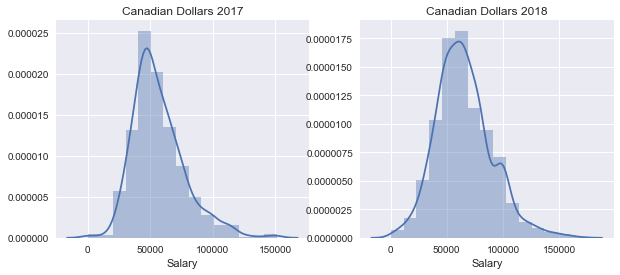

In [24]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Canadian dollars (C$)']['Salary'], bins = 15, ax = axis1)
axis1.set_title('Canadian Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Canadian dollars (C$)']['Salary'], bins = 15, ax = axis2)
axis2.set_title('Canadian Dollars 2018')

### 2.6 - Chinese Yuan
The average salary for a Chinese software developer is ~25k.  The threshold for 2018 is set to 150k.  After setting the threshold, the 2018 distribution looks generally reasonable, but skewed.  Setting a lower threshold on the 2017 data also gives skewed results.  In both cases, the peak salary still is centered around 25k.  

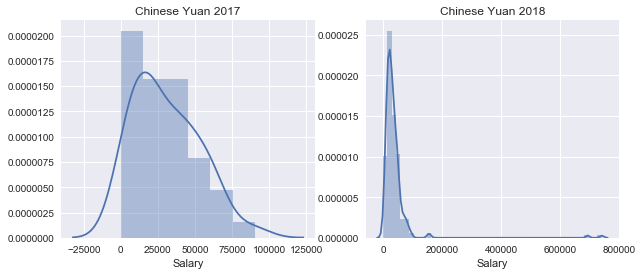

In [25]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Chinese yuan renminbi (¥)']['Salary'], ax = axis1)
axis1.set_title('Chinese Yuan 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Chinese yuan renminbi (¥)']['Salary'], ax = axis2)
axis2.set_title('Chinese Yuan 2018')

In [26]:
divide_sal(df_2018, 'Chinese yuan renminbi (¥)', 150000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
multiply_sal(df_2017, 'Chinese yuan renminbi (¥)', 2500)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


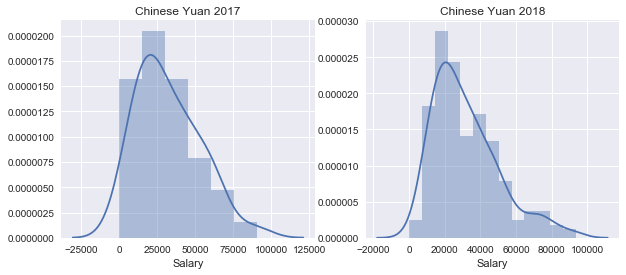

In [28]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Chinese yuan renminbi (¥)']['Salary'], ax = axis1)
axis1.set_title('Chinese Yuan 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Chinese yuan renminbi (¥)']['Salary'], ax = axis2)
axis2.set_title('Chinese Yuan 2018')

### 2.7 - Danish Krone
In 2017, no one paid in Danish currency took part in the survey, so its more difficult to determine where the threshold will be.  Luckily, after setting the threshold to 200k, the resulting distribution looks reasonable.  The average Danish software developer's salary is ~80k, which is pretty spot on with the distribution.

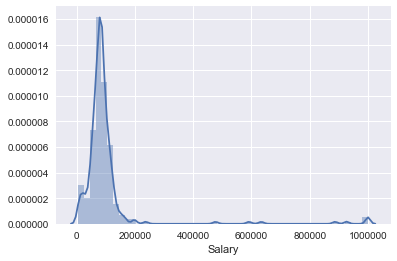

In [29]:
sns.distplot(df_2018[df_2018['Currency'] == 'Danish krone (kr)']['Salary'])

In [30]:
divide_sal(df_2018, 'Danish krone (kr)', 200000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


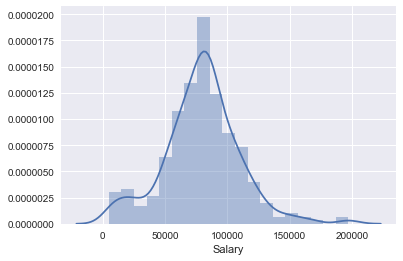

In [31]:
sns.distplot(df_2018[df_2018['Currency'] == 'Danish krone (kr)']['Salary'])

### 2.8 - European Union Euros
Since the European Union is comprised of multiple countries, I didn't try to find an average salary.  Luckily, the 2017 data is available, and it suggests that peak salaries are at ~50k.  For the 2018 data, I've put the threshold at 200k, and 2500 for the 2017 data.

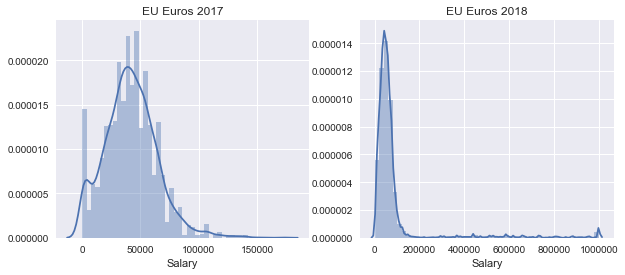

In [32]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Euros (€)']['Salary'], ax = axis1)
axis1.set_title('EU Euros 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Euros (€)']['Salary'], ax = axis2)
axis2.set_title('EU Euros 2018')

In [33]:
divide_sal(df_2018, 'Euros (€)', 200000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
multiply_sal(df_2017, 'Euros (€)', 2500)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


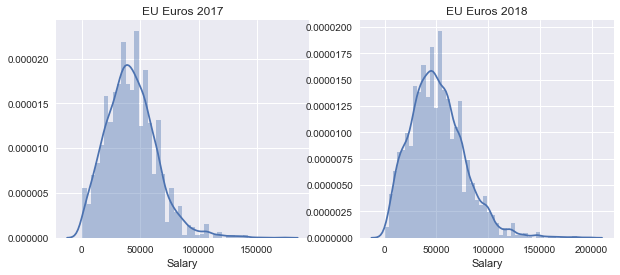

In [35]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Euros (€)']['Salary'], ax = axis1)
axis1.set_title('EU Euros 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Euros (€)']['Salary'], ax = axis2)
axis2.set_title('EU Euros 2018')

### 2.9 - Indian Rupees
The average annual salary for an Indian software developer is a dismal 5k.  While the peaks for both years is indeed around 5k, both distributions are extremely skewed, making it difficult to determine where the threshold for 2018 salaries should be.  Since there is only one respondent with a salary over 75k in 2017, I'll put that as the threshold for both years.

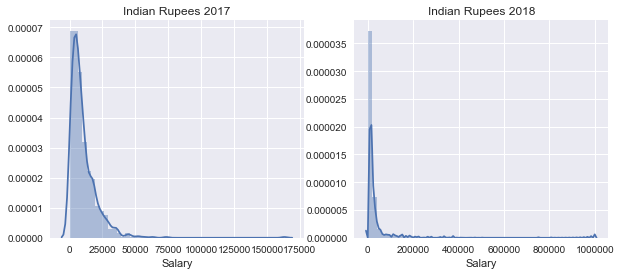

In [36]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Indian rupees (?)']['Salary'], ax = axis1)
axis1.set_title('Indian Rupees 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Indian rupees (₹)']['Salary'], ax = axis2)
axis2.set_title('Indian Rupees 2018')

In [37]:
divide_sal(df_2018, 'Indian rupees (₹)', 100000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
divide_sal(df_2018, 'Indian rupees (₹)', 75000)
divide_sal(df_2017, 'Indian rupees (?)', 75000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


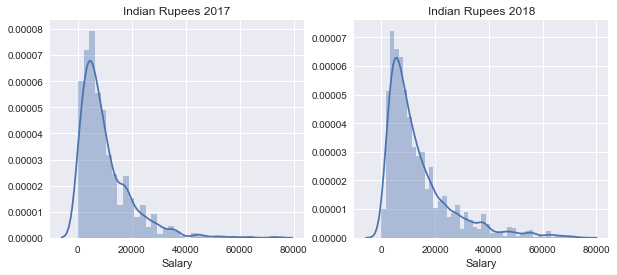

In [39]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Indian rupees (?)']['Salary'], ax = axis1)
axis1.set_title('Indian Rupees 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Indian rupees (₹)']['Salary'], ax = axis2)
axis2.set_title('Indian Rupees 2018')

### 2.10 - Japanese Yen
The average annual salary for a Japanese software developer is ~40k.  With a threshold of 200k for the 2018 data, both distributions show similar results.

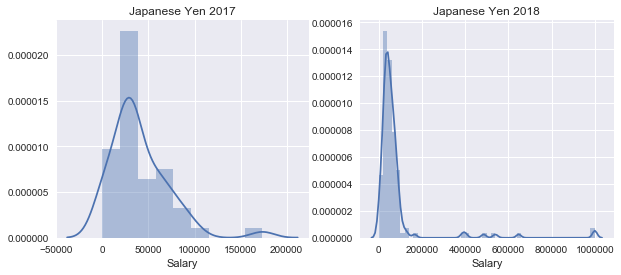

In [40]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Japanese yen (¥)']['Salary'], ax = axis1)
axis1.set_title('Japanese Yen 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Japanese yen (¥)']['Salary'], ax = axis2)
axis2.set_title('Japanese Yen 2018')

In [41]:
divide_sal(df_2018,'Japanese yen (¥)', 200000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


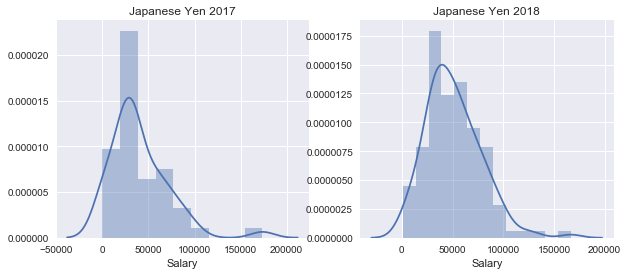

In [42]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Japanese yen (¥)']['Salary'], ax = axis1)
axis1.set_title('Japanese Yen 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Japanese yen (¥)']['Salary'], ax = axis2)
axis2.set_title('Japanese Yen 2018')

### 2.11 - Mexican Pesos
The annual salary for a Mexican software developer is ~15k.  While there are a few salaries above 70k in 2018, there was only one above 70k in 2017.  I set the threshold to 70k for both years.  In addition, the lower threshold for 2017 is set to 2000.

The resulting distribution for 2018 looks as one would expect, with a peak around 15k.  However, the distribution for 2017 is different, with far more salaries nearer the 0 range than expected.

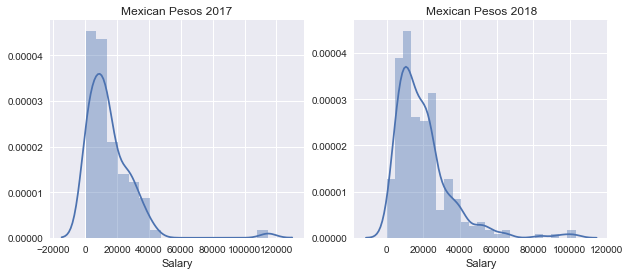

In [43]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Mexican pesos (MXN$)']['Salary'], ax = axis1)
axis1.set_title('Mexican Pesos 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Mexican pesos (MXN$)']['Salary'], ax = axis2)
axis2.set_title('Mexican Pesos 2018')

In [44]:
divide_sal(df_2017, 'Mexican pesos (MXN$)', 70000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
divide_sal(df_2018, 'Mexican pesos (MXN$)', 70000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
multiply_sal(df_2017, 'Mexican pesos (MXN$)', 2000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


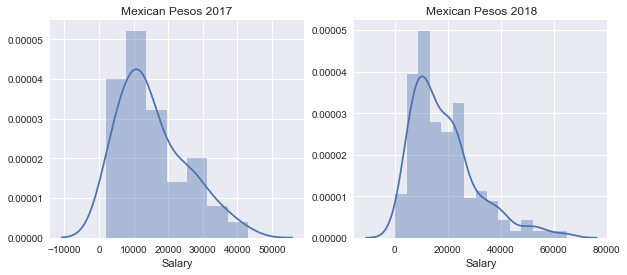

In [47]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Mexican pesos (MXN$)']['Salary'], ax = axis1)
axis1.set_title('Mexican Pesos 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Mexican pesos (MXN$)']['Salary'], ax = axis2)
axis2.set_title('Mexican Pesos 2018')


### 2.12 - Norwegian Krone 
No Norwegian currencies were reported in 2017.  The annual average salary for a Norwegian software developer is ~70k.  I've put the threshold at 175k.  The resulting distribution has a surprising number of people with salaries above 125k.  

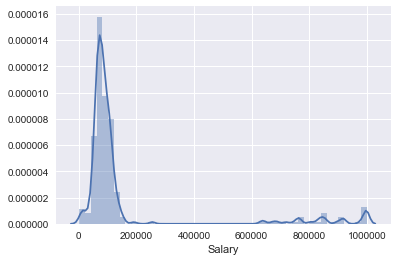

In [48]:
sns.distplot(df_2018[df_2018['Currency'] == 'Norwegian krone (kr)']['Salary'])

In [49]:
divide_sal(df_2018, 'Norwegian krone (kr)', 175000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


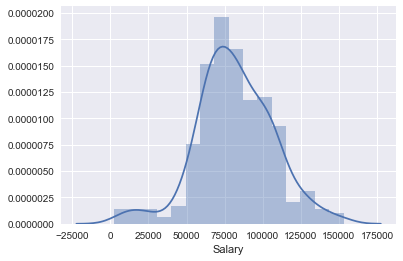

In [50]:
sns.distplot(df_2018[df_2018['Currency'] == 'Norwegian krone (kr)']['Salary'])

### 2.13 - Polish Zloty
The average annual salary of a Polish software developer is ~23k.  The average salary is reflected in the 2018 distribution pretty well, but the 2017 distribution has a bimodal model, with peaks near 0 and 25k.  The lower threshold for 2017 is set at 2000.

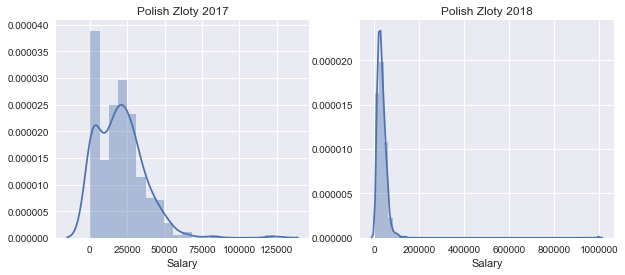

In [51]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Polish zloty (zl)']['Salary'], ax = axis1)
axis1.set_title('Polish Zloty 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Polish złoty (zł)']['Salary'], ax = axis2)
axis2.set_title('Polish Zloty 2018')


In [52]:
divide_sal(df_2018, 'Polish złoty (zł)', 150000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
multiply_sal(df_2017, 'Polish zloty (zl)', 2000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


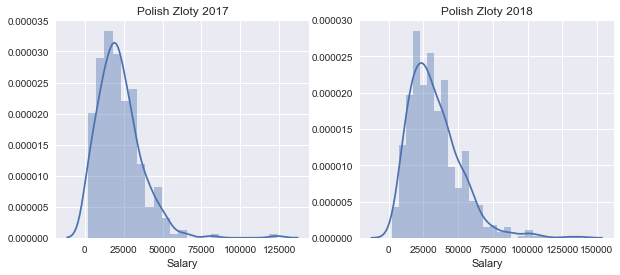

In [54]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Polish zloty (zl)']['Salary'], ax = axis1)
axis1.set_title('Polish Zloty 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Polish złoty (zł)']['Salary'], ax = axis2)
axis2.set_title('Polish Zloty 2018')


### 2.14 - Russian Rubles
The average annual salary for a Russian software developer is ~18k.  After setting the threshold at 200k, the 2018 distribution matches the average salary.  The 2017 distribution is a little strange, even after setting a lower threshold at 2000.  A possible explanation is that there are only ~150 respondents from 2017, but 900+ respondents for 2018, giving a more accurate representation for 2018 data.  

In [55]:
len(df_2018[df_2018['Currency'] == 'Russian rubles (₽)'])

987

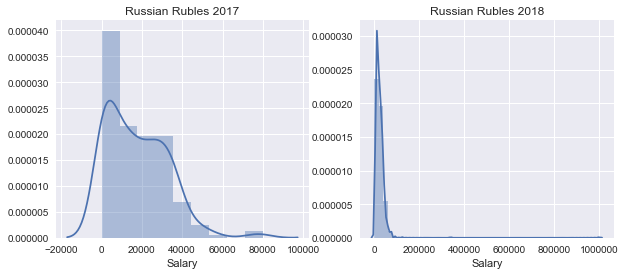

In [56]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Russian rubles (?)']['Salary'], ax = axis1)
axis1.set_title('Russian Rubles 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Russian rubles (₽)']['Salary'], ax = axis2)
axis2.set_title('Russian Rubles 2018')


In [57]:
divide_sal(df_2018, 'Russian rubles (₽)', 200000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
multiply_sal(df_2017, 'Russian rubles (?)', 2000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


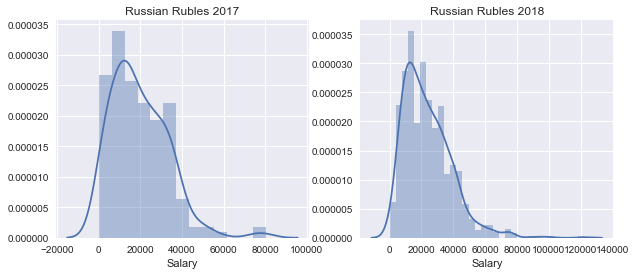

In [59]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Russian rubles (?)']['Salary'], ax = axis1)
axis1.set_title('Russian Rubles 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Russian rubles (₽)']['Salary'], ax = axis2)
axis2.set_title('Russian Rubles 2018')


### 2.15 - Singaporean dollars
After applying a threshold of 150k to the 2018 data, both distributions show peaks at the average annual salary of 37k.

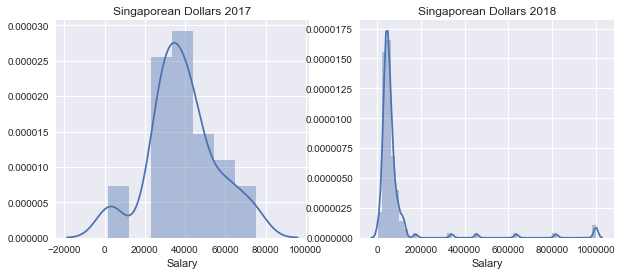

In [60]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Singapore dollars (S$)']['Salary'], ax = axis1)
axis1.set_title('Singaporean Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Singapore dollars (S$)']['Salary'], ax = axis2)
axis2.set_title('Singaporean Dollars 2018')

In [61]:
divide_sal(df_2018, 'Singapore dollars (S$)', 150000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


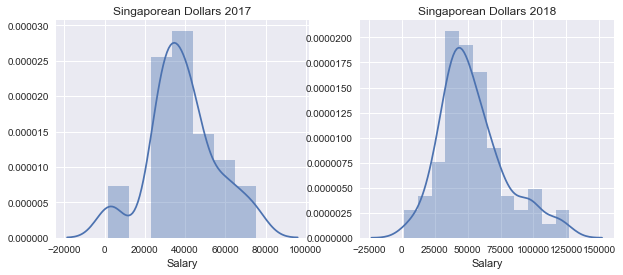

In [62]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Singapore dollars (S$)']['Salary'], ax = axis1)
axis1.set_title('Singaporean Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Singapore dollars (S$)']['Salary'], ax = axis2)
axis2.set_title('Singaporean Dollars 2018')


### 2.16 - South African Rands
The average annual salary for a South African software developer is ~21k.  After applying a threshold of 150k, the 2018 data reflects this average.  The 2017 data however, again has a bimodal distribution, so the threshold was set at 3000.

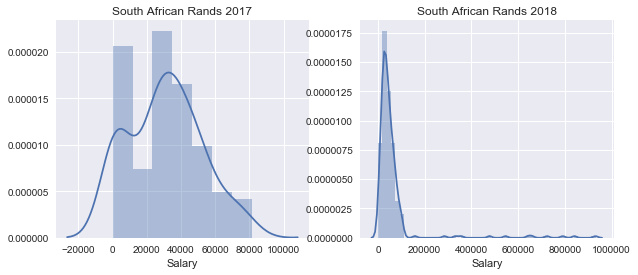

In [63]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'South African rands (R)']['Salary'], ax = axis1)
axis1.set_title('South African Rands 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'South African rands (R)']['Salary'], ax = axis2)
axis2.set_title('South African Rands 2018')

In [64]:
divide_sal(df_2018, 'South African rands (R)', 150000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
multiply_sal(df_2017, 'South African rands (R)', 3000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


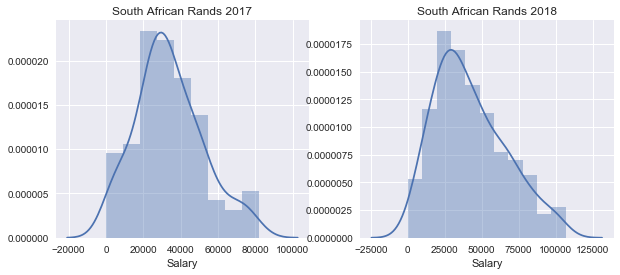

In [66]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'South African rands (R)']['Salary'], ax = axis1)
axis1.set_title('South African Rands 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'South African rands (R)']['Salary'], ax = axis2)
axis2.set_title('South African Rands 2018')

### 2.17 - Swedish Kroner
After applying the threshold of 150k to the 2018 data, both distributions reflect an average salary of ~55k.  The 2017 data is also a bimodal model however, with a sizable peak near 0.  The lower threshold for the 2017 data is set at 5000.

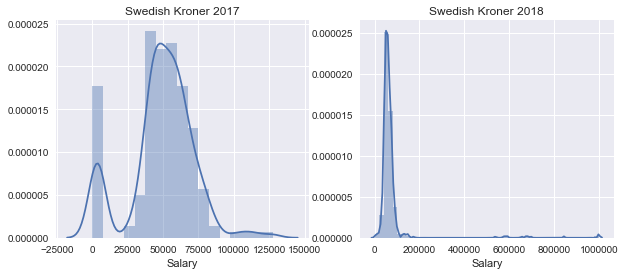

In [67]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Swedish kroner (SEK)']['Salary'], ax = axis1)
axis1.set_title('Swedish Kroner 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Swedish kroner (SEK)']['Salary'], ax = axis2)
axis2.set_title('Swedish Kroner 2018')

In [68]:
divide_sal(df_2018, 'Swedish kroner (SEK)', 150000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [69]:
multiply_sal(df_2017, 'Swedish kroner (SEK)', 5000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


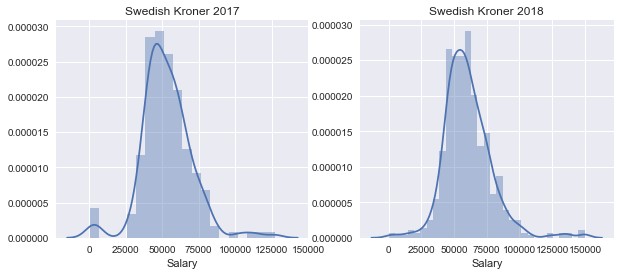

In [70]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Swedish kroner (SEK)']['Salary'], ax = axis1)
axis1.set_title('Swedish Kroner 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Swedish kroner (SEK)']['Salary'], ax = axis2)
axis2.set_title('Swedish Kroner 2018')

### 2.18 - Swiss Francs
After applying a threshold of 300k, both distributions reflect an annual average of ~90k.  Interestingly, both distributions are bimodal.

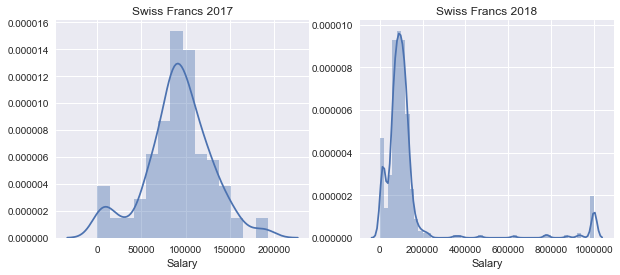

In [71]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Swiss francs']['Salary'], ax = axis1)
axis1.set_title('Swiss Francs 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Swiss francs']['Salary'], ax = axis2)
axis2.set_title('Swiss Francs 2018')

In [72]:
divide_sal(df_2018, 'Swiss francs', 300000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


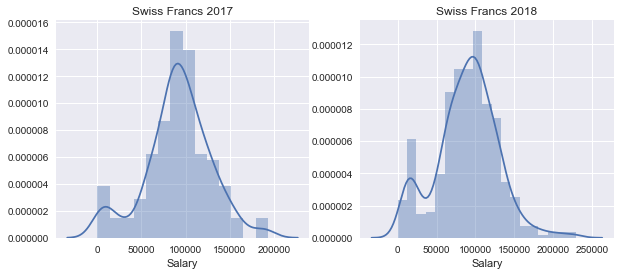

In [73]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'Swiss francs']['Salary'], ax = axis1)
axis1.set_title('Swiss Francs 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'Swiss francs']['Salary'], ax = axis2)
axis2.set_title('Swiss Francs 2018')

### 2.19 - US dollars
After applying a threshold of 300k to the 2018 data, both distributions show a peak at the average annual sallayr of 70k.  

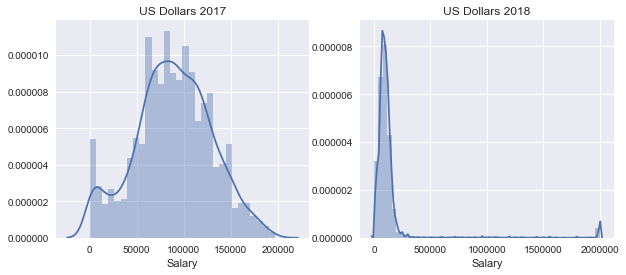

In [74]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'U.S. dollars ($)']['Salary'], ax = axis1)
axis1.set_title('US Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'U.S. dollars ($)']['Salary'], ax = axis2)
axis2.set_title('US Dollars 2018')

In [75]:
divide_sal(df_2018,'U.S. dollars ($)', 300000)

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


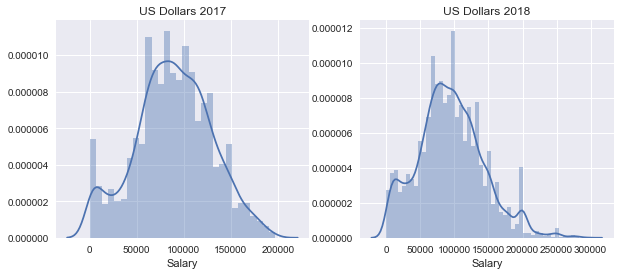

In [76]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_2017[df_2017['Currency'] == 'U.S. dollars ($)']['Salary'], ax = axis1)
axis1.set_title('US Dollars 2017')

sns.distplot(df_2018[df_2018['Currency'] == 'U.S. dollars ($)']['Salary'], ax = axis2)
axis2.set_title('US Dollars 2018')

In [77]:
# import os
# os.makedirs('tmp', exist_ok=True)
# df_2017.to_feather('tmp/df_2017_3salary')
# df_2018.to_feather('tmp/df_2018_3salary')

# 3 - Rounding Salaries
A test to see if rounding salaries to the nearest thousands would improve predictions.  

In [78]:
def rounding(col):
    return round(col/1000, 0)*1000

In [79]:
df_2017['Salary'] = df_2017['Salary'].apply(rounding)
df_2018['Salary'] = df_2018['Salary'].apply(rounding)

In [80]:
import os
os.makedirs('tmp', exist_ok=True)
df_2017.to_feather('tmp/df_2017_5lower')
df_2018.to_feather('tmp/df_2018_5lower')